# Atividade prática 10

Isabella Menezes Ramos - 3474

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))
iris_df['target'] = iris_df['target'].astype('int64')

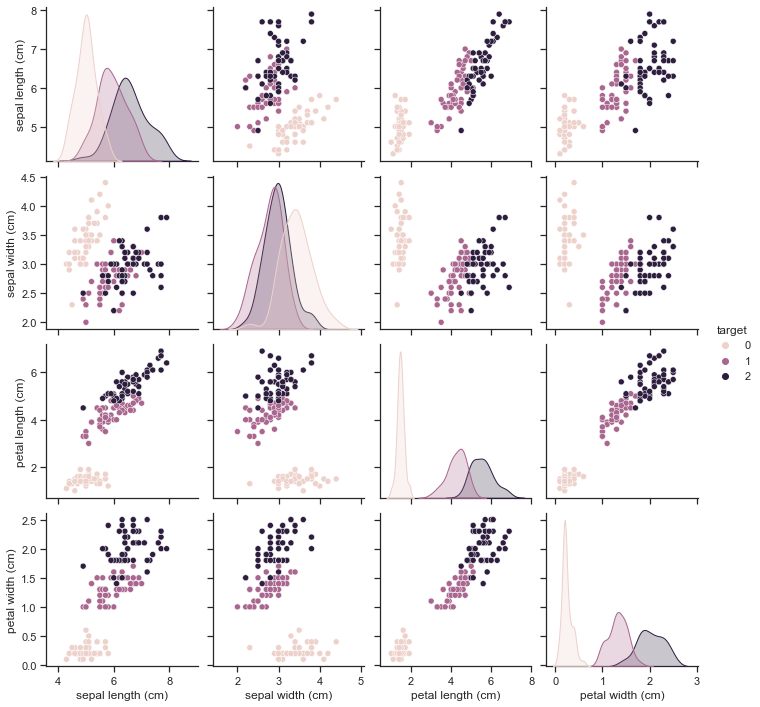

In [3]:
sns.set(style = "ticks")
sns.pairplot(iris_df, hue="target")
plt.show()

In [4]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(iris_df[[u'sepal length (cm)', u'sepal width (cm)',
                    u'petal length (cm)',u'petal width (cm)']])

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


KMeans(n_clusters=3)

In [5]:
print(k_means.cluster_centers_)
iris_df.groupby('target')[[u'sepal length (cm)', u'sepal width (cm)',
                    u'petal length (cm)',u'petal width (cm)']].mean()

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


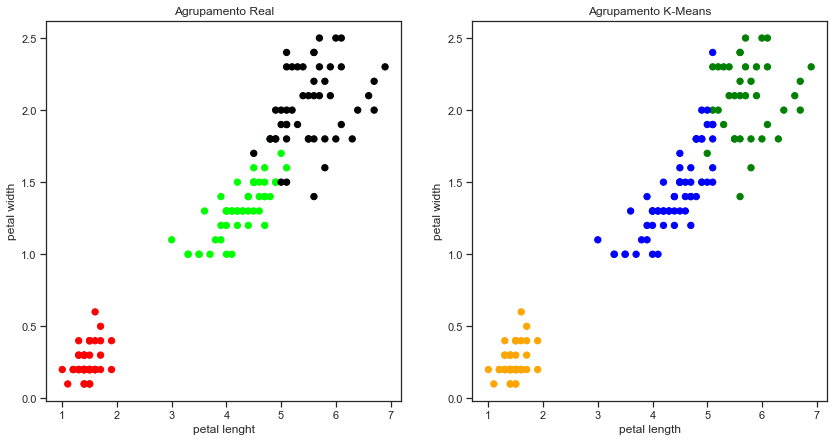

In [6]:
plt.figure(figsize=(14,7))

colormap_real = np.array(['red','lime','black'])
colormap_group = np.array(['blue', 'orange','green'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=colormap_real[iris_df[u'target']], s=40)
plt.title('Agrupamento Real')
plt.xlabel("petal lenght")
plt.ylabel("petal width")

plt.subplot(1,2,2)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=colormap_group[k_means.labels_],s=40)
plt.title('Agrupamento K-Means')
plt.xlabel("petal length")
plt.ylabel("petal width")

plt.show()

# Atividades

In [7]:
df = pd.read_csv('weatherHistory.csv', index_col=False)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [10]:
def NormalizacaoSummary(row):
    categories = {
        "Breezy": 0,
        "Breezy and Dry": 1,
        "Breezy and Foggy": 2,
        "Breezy and Mostly Cloudy": 3,
        "Breezy and Overcast": 4,
        "Breezy and Partly Cloudy": 5,
        "Clear": 6,
        "Dangerously Windy and Partly Cloudy": 7,
        "Drizzle": 8,
        "Dry": 9,
        "Dry and Mostly Cloudy": 10,
        "Dry and Partly Cloudy": 11,
        "Foggy": 12,
        "Humid and Mostly Cloudy": 13,
        "Humid and Overcast": 14,
        "Humid and Partly Cloudy": 15,
        "Light Rain": 16,
        "Mostly Cloudy": 17,
        "Overcast": 18,
        "Partly Cloudy": 19,
        "Rain": 20,
        "Windy": 21,
        "Windy and Dry": 22,
        "Windy and Foggy": 23,
        "Windy and Mostly Cloudy": 24,
        "Windy and Overcast": 25,
        "Windy and Partly Cloudy": 26
    }
    
    return categories[row['Summary']]

In [9]:
def NormalizacaoPrecipType(row):
    if(row['Precip Type'] == 'rain'): 
        return 0
    return 1

In [11]:
df['Summary'] = df.apply (lambda row: NormalizacaoSummary(row), axis=1)
df['Precip Type'] = df.apply (lambda row: NormalizacaoPrecipType(row), axis=1)
df = df.drop(["Daily Summary", "Formatted Date"], axis=1)
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [12]:
precipType = df.dropna(subset=['Precip Type'])

In [17]:
X = df[['Temperature (C)', 'Humidity']]

k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)

KMeans(n_clusters=2)

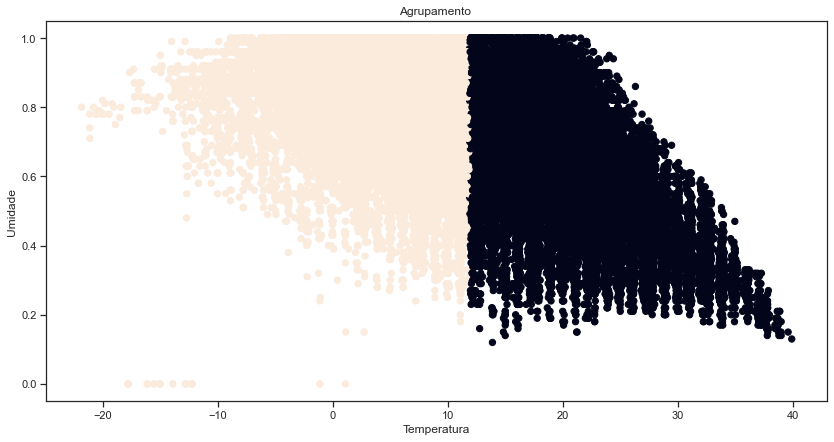

In [19]:
plt.figure(figsize=(14,7))

colormap_real = np.array(['red','lime','black'])
colormap_group = np.array(['blue', 'orange','green'])

plt.scatter(x=df['Temperature (C)'], y=df['Humidity'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel("Temperatura")
plt.ylabel("Umidade")
plt.show()

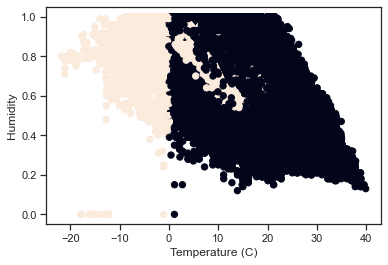

In [22]:
precip = np.array([0,1])

plt.scatter(df['Temperature (C)'], df['Humidity'], c=precip[df['Precip Type']], s=40);

plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")

plt.show()

In [25]:
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5864292194299561

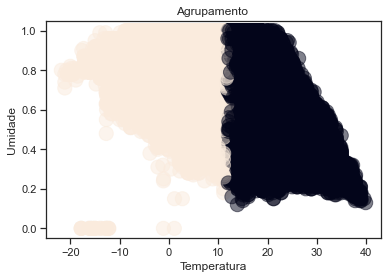

In [27]:

colormap_real = np.array(['red','lime','black'])
colormap_group = np.array(['blue', 'orange','green'])

plt.scatter(x=df['Temperature (C)'], y=df['Humidity'], c=k_means.labels_, s=20, alpha=0.5)
plt.title('Agrupamento ')
plt.xlabel("Temperatura")
plt.ylabel("Umidade")
plt.show()